#CNN MODEL

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive

drive.mount('/content/drive')

# Load CSV file containing image paths
csv_path = "Test_Floos (2) (1).csv"
df = pd.read_csv(csv_path)

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Assuming input size of 224x224
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

# Load images and preprocess them
X = np.array([load_and_preprocess_image(image_path) for image_path in df['File Path After Processing']])
y = df['type'].values  # Assuming your CSV has a column named 'label_column'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)  # Assuming num_classes is the number of output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history= model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
16/16 [==============================] - 71s 4s/step - loss: 1.5947 - accuracy: 0.4941 - val_loss: 0.6907 - val_accuracy: 0.5748
Epoch 2/10
16/16 [==============================] - 57s 4s/step - loss: 0.6862 - accuracy: 0.5672 - val_loss: 0.6683 - val_accuracy: 0.6142
Epoch 3/10
16/16 [==============================] - 56s 4s/step - loss: 0.6598 - accuracy: 0.6225 - val_loss: 0.6018 - val_accuracy: 0.6614
Epoch 4/10
16/16 [==============================] - 59s 4s/step - loss: 0.5738 - accuracy: 0.7194 - val_loss: 0.5349 - val_accuracy: 0.6378
Epoch 5/10
16/16 [==============================] - 64s 4s/step - loss: 0.5003 - accuracy: 0.7292 - val_loss: 0.4777 - val_accuracy: 0.7402
Epoch 6/10
16/16 [==============================] - 62s 4s/step - loss: 0.4061 - accuracy: 0.8419 - val_loss: 0.3849 - val_accuracy: 0.8268
Epoch 7/10
16/16 [=============

4/4 - 4s - loss: 0.2509 - accuracy: 0.9055 - 4s/epoch - 1s/step


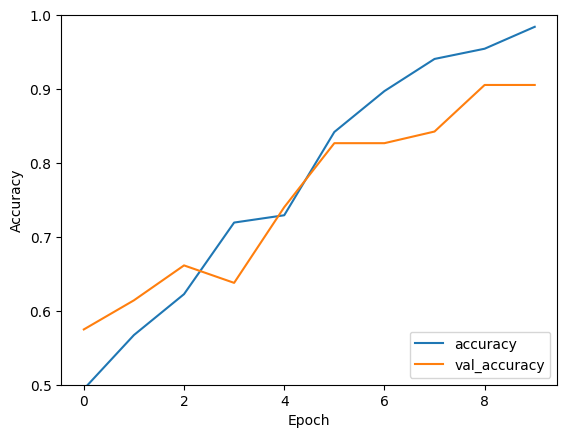

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
print(test_acc)

0.9055117964744568


##Performance Measures

###Quantitative measurs

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute the accuracy, precision, recall, and f-measure
accuracy = accuracy_score(y_test, np.argmax(model.predict(X_test), axis=1))
precision = precision_score(y_test, np.argmax(model.predict(X_test), axis=1))
recall = recall_score(y_test, np.argmax(model.predict(X_test), axis=1))
f1 = f1_score(y_test, np.argmax(model.predict(X_test), axis=1))

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1)

4/4 [==============================] - 5s 1s/step
Accuracy: 0.9133858267716536
Precision: 0.8985507246376812
Recall: 0.9393939393939394
F-measure: 0.9185185185185185


4/4 [==============================] - 5s 1s/step


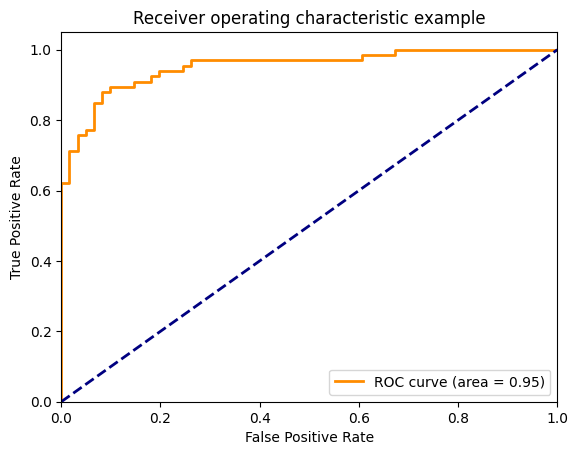

AUC: 0.9523099850968704


In [ ]:

import matplotlib.pyplot as plt
# Calculate ROC curve and AUC
from sklearn.metrics import roc_curve, auc

# Predict probability scores for the test set
y_prob = model.predict(X_test)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("AUC:", roc_auc)


###Qualitative Measures

4/4 [==============================] - 4s 905ms/step


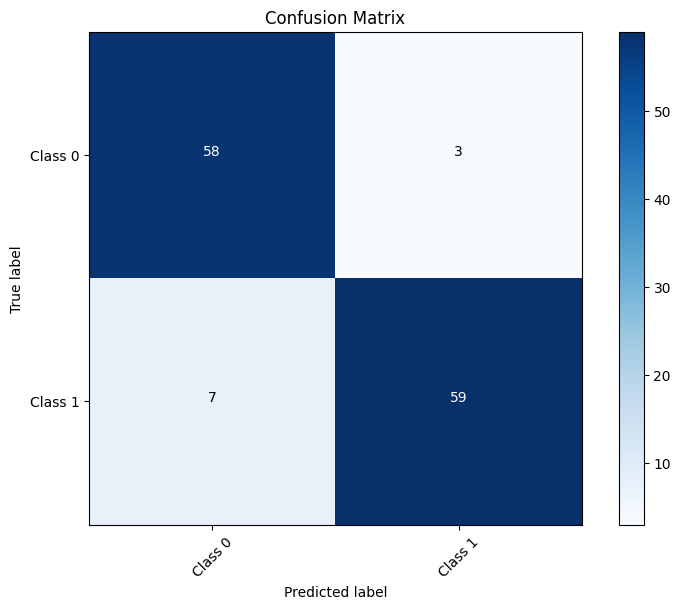

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Predict classes for test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']  # Update with your actual class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


###Showing the wrongly identified images

1/1 [==============================] - 0s 71ms/step


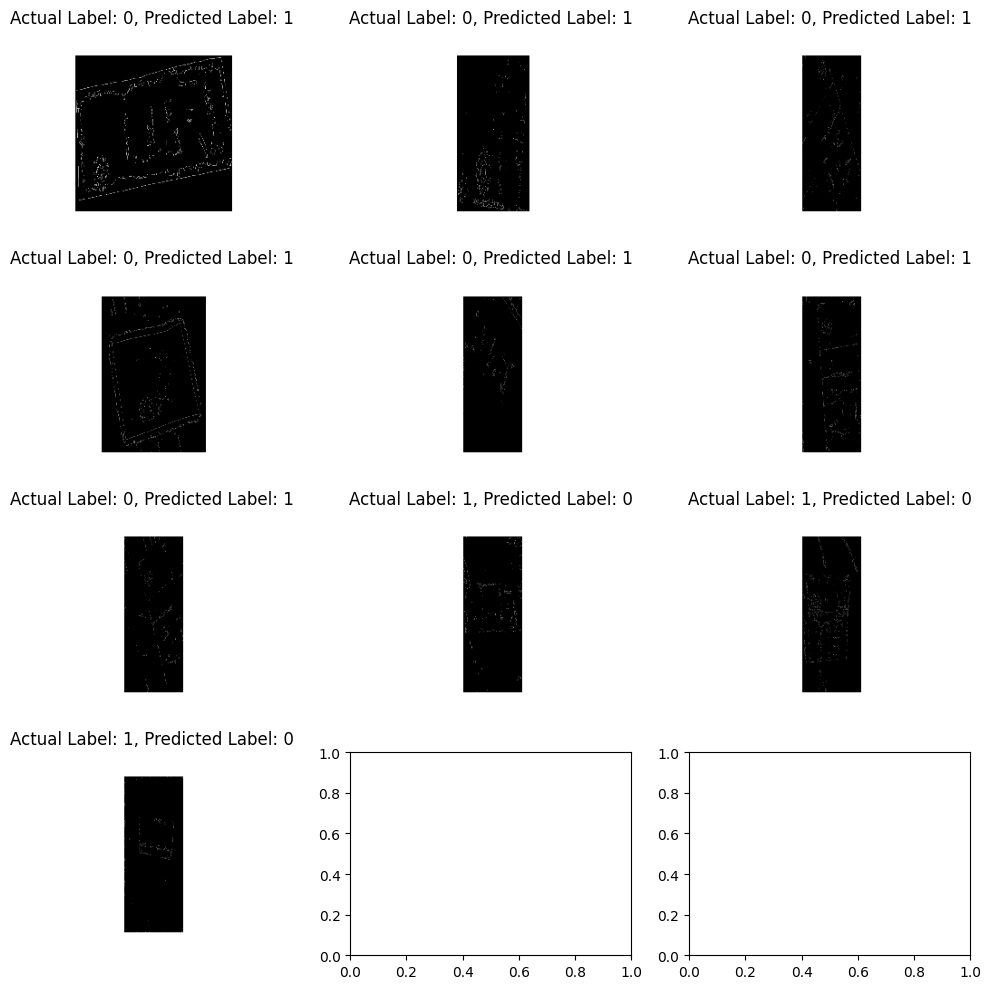

In [ ]:
# Get the indices of misclassified instances
misclassified_indices = np.where(y_test != np.argmax(model.predict(X_test), axis=1))[0]

# Display some misclassified images along with their predicted and actual labels
num_samples = 10  # Number of misclassified samples to display
num_rows = 4
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    if i < num_samples:
        index = misclassified_indices[i]
        image = X_test[index]  # Get the misclassified image
        # Reshape the image to match the expected input shape (batch_size=1)
        image = np.expand_dims(image, axis=0)

        # Make prediction
        predicted_label = np.argmax(model.predict(image))

        # Plot the misclassified image along with predicted and actual labels
        ax.imshow(image.squeeze())  # Remove the batch dimension before plotting
        ax.set_title(f"Actual Label: {y_test[index]}, Predicted Label: {predicted_label}")
        ax.axis('off')

plt.tight_layout()
plt.show()


#Logistic Regression Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from google.colab import drive

# Mount Google Drive

drive.mount('/content/drive')


def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Assuming input size of 224x224
    img_array = img_to_array(img)
    return img_array / 255.0  # Normalize pixel values

def load_data(csv_path):
    df = pd.read_csv(csv_path)
    return df

def preprocess_data(df):
    X_paths = df['File Path After Processing']
    y = df['type']
    X_images = np.array([load_and_preprocess_image(image_path) for image_path in X_paths])
    return X_images, y

if __name__ == "__main__":
    # Load data
    csv_path = "Test_Floos (2) (1).csv"
    df = load_data(csv_path)

    # Preprocess data
    X, y = preprocess_data(df)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    # Define Logistic Regression classifier
    classifier = LogisticRegression(C=8, solver='liblinear', multi_class='ovr', random_state=0)

    # Train and evaluate Logistic Regression classifier
    classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    acc_test = classifier.score(X_test.reshape(X_test.shape[0], -1), y_test) * 100
    acc_combined = classifier.score(np.concatenate([X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)]),
                                    np.concatenate([y_train, y_test])) * 100

    # Display results
    results = pd.DataFrame({'Accuracy %': [acc_test], 'Combined Accuracy %': [acc_combined]}, index=['Logistic Regression'])
    print(results)


Mounted at /content/drive
                     Accuracy %  Combined Accuracy %
Logistic Regression   85.263158            95.576619


##Performance Measures

###Quantitative Measures

In [ ]:
# prompt: compute the accuracy, precision, recall, and f-measure for this model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict classes for test set
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], -1))

# Compute accuracy, precision, recall, and f-measure
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-measure:", f1)


Accuracy: 0.8526315789473684
Precision: 0.8525586103003483
Recall: 0.8526315789473684
F-measure: 0.8525000146835116


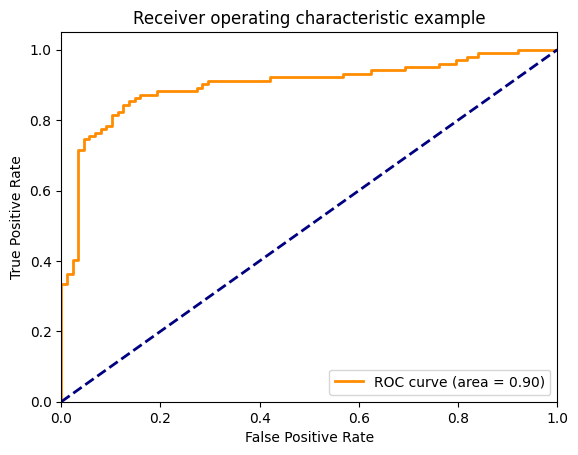

AUC: 0.8995098039215685


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test.reshape(X_test.shape[0], -1))[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("AUC:", roc_auc)


###Qualitative Measures

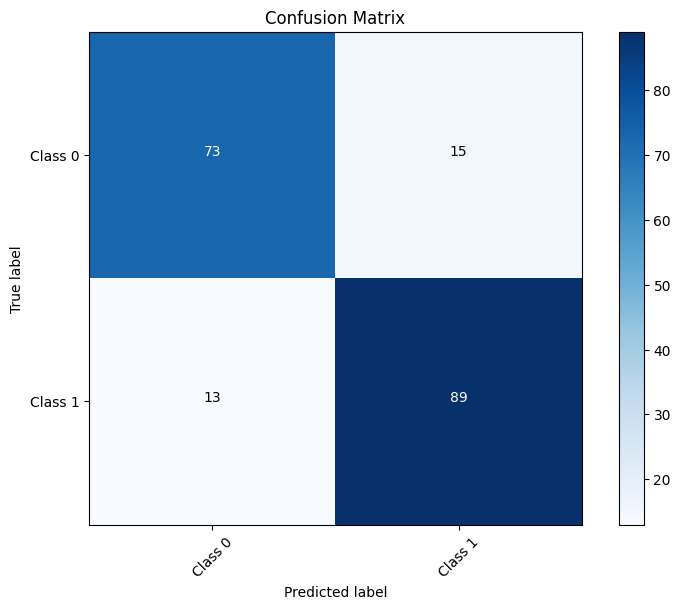

In [ ]:
# prompt: compute the confusion matrix and plot it for the previous model

import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']  # Update with your actual class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
